<a href="https://colab.research.google.com/github/robitussin/CCADMACL_EXERCISES/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

In [27]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

housing = fetch_california_housing(as_frame=True)

In [28]:
target = housing.target

In [29]:
features = housing.data[["Longitude", "Latitude"]]

In [30]:
features.head()

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [31]:
df = pd.concat([features, target])
df

,Longitude,Latitude,MedHouseVal
0,-122.23,37.88,NaN
1,-122.22,37.86,NaN
2,-122.24,37.85,NaN
3,-122.25,37.85,NaN
4,-122.25,37.85,NaN
...,...,...,...
20635,NaN,NaN,0.781
20636,NaN,NaN,0.771
20637,NaN,NaN,0.923
20638,NaN,NaN,0.847


<Axes: xlabel='Longitude', ylabel='Latitude'>

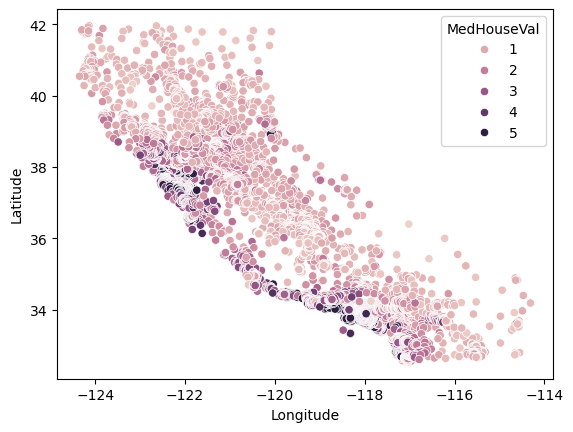

In [32]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

In [33]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

C:\Users\carla\AppData\Local\Temp\ipykernel_17260\823069323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
C:\Users\carla\AppData\Local\Temp\ipykernel_17260\823069323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[['MedHouseVal']], test_size=0.33, random_state=0)

In [35]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

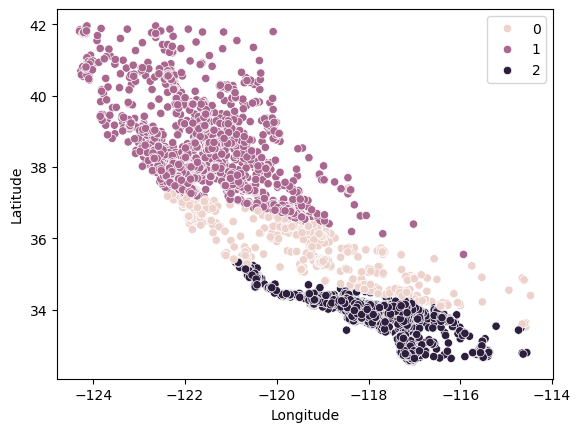

In [37]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

## Use the Elbow method to find the correct value of K

For cluster = 1, SSE/WCSS is 2.069017260516105
For cluster = 2, SSE/WCSS is 0.8284273171162371
For cluster = 3, SSE/WCSS is 0.2896383867599396
For cluster = 4, SSE/WCSS is 0.1327471990633354
For cluster = 5, SSE/WCSS is 0.08993069099853145
For cluster = 6, SSE/WCSS is 0.05468192569003251
For cluster = 7, SSE/WCSS is 0.04024303237479253
For cluster = 8, SSE/WCSS is 0.031246461538057047
For cluster = 9, SSE/WCSS is 0.025368883173394464
For cluster = 10, SSE/WCSS is 0.020217884100799395


Text(0, 0.5, 'WCSS')

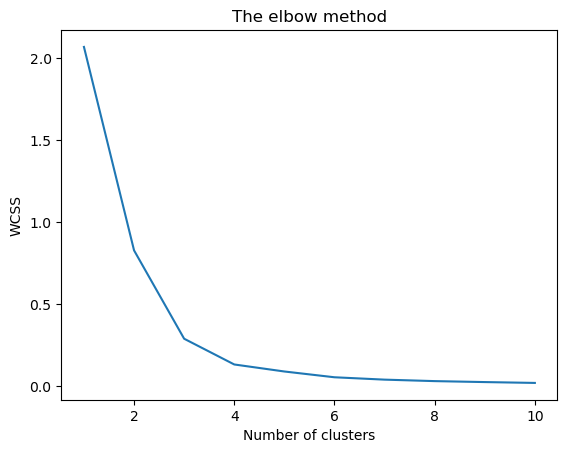

In [39]:
wcss=[]
sse={}

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=4, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

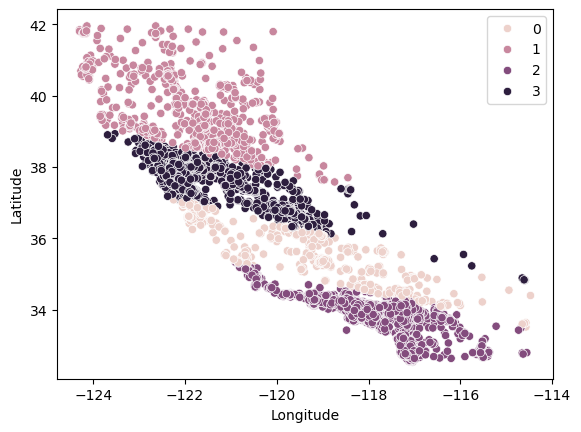

In [41]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)